<a href="https://colab.research.google.com/github/ancestor9/24_fall_python-programimming-2/blob/main/Capstone_Design_01_rocket_launch_simple_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'> **Data Pipeline flows with Stepwise Blocks**


##  <font color='red'>**Block 1: Create a Temporary Folder & Download Launches Data**
> ### **@data_loader**

### https://ll.thespacedevs.com/2.0.0/launch/upcoming 직접 가서 확인하기

In [ ]:
import requests
import pandas as pd
import os

def download_launches():
    cur_dir = '/content'
    url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
    os.makedirs(f"rocket", exist_ok=True)
    # print(f"wahrer r u? : {cur_dir}/rocket")
    response = requests.get(url)
    with open(f"rocket/launches.json", "wb") as f:
        f.write(response.content)

In [ ]:
download_launches()

##  <font color='red'>**Block 2: Get Pictures**
- This block will be a direct translation of the _get_pictures function from your Airflow script.
> ### **@data_transformer**

In [ ]:
import json
import requests.exceptions as requests_exceptions

In [ ]:
def get_pictures(*args, **kwargs):

    os.makedirs(f"image", exist_ok=True)
    with open("./rocket/launches.json") as f:
        launches = json.load(f)

    image_urls = [launch["image"] for launch in launches["results"]]
    print(image_urls)

    for image_url in image_urls:
        response = requests.get(image_url)
        image_filename = image_url.split("/")[-1]
        target_file = f"./image/{image_filename}"

        with open(target_file, "wb") as f:
            f.write(response.content)

In [ ]:
def get_pictures(*args, **kwargs):
    os.makedirs(f"image", exist_ok=True)
    with open("./rocket/launches.json") as f:
        launches = json.load(f)

    image_urls = [launch["image"] for launch in launches["results"]]
    print(image_urls)

    for image_url in image_urls:
        try:
            response = requests.get(image_url)
            image_filename = image_url.split("/")[-1]
            target_file = f"./image/{image_filename}"

            with open(target_file, "wb") as f:
                f.write(response.content)

            print(f"Downloaded {image_url} to {target_file}")

        except requests_exceptions.MissingSchema:
            print(f"{image_url} appears to be an invalid URL.")

        except requests_exceptions.ConnectionError:
            print(f"Could not connect to {image_url}.")

In [ ]:
get_pictures()

['https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg', 'https://thespacedevs-

## <font color='red'>**Block 3: Notify Launching Pictures**
> ### **@data_exporter**

In [ ]:
def notify(*args, **kwargs):
    images_count = len(os.listdir("./image/"))
    if images_count > 0:
        print(f"There are now {images_count} images.")
    else :
        print("No images downloaded")

In [ ]:
notify()

There are now 9 images.


### **이미지 시각화하기**

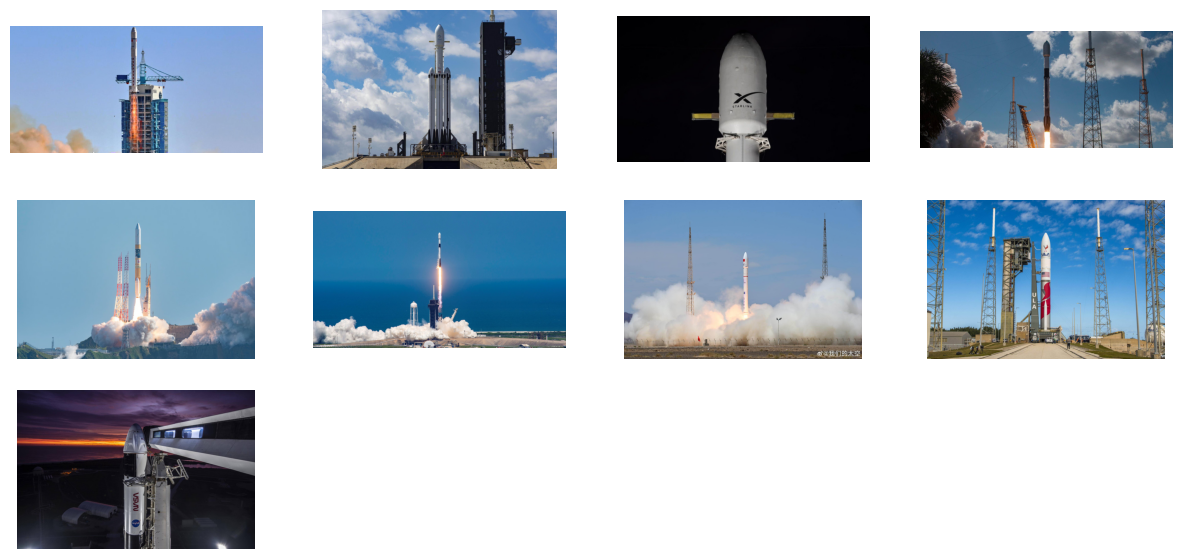

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

image_files = glob.glob('./image/*')

plt.figure(figsize=(15, 7))
for i, file in enumerate(image_files):
    plt.subplot(3, 4, i+1)  # 3행 4열의 그림 위치를 지정
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# END

### **모듈로 돌려보기(기초)**

In [ ]:
%%writefile data_ETL.py

import requests
import pandas as pd
import os
import json
import requests.exceptions as requests_exceptions

def download_launches():
    cur_dir = '/content'
    url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
    os.makedirs(f"rocket", exist_ok=True)
    # print(f"wahrer r u? : {cur_dir}/rocket")
    response = requests.get(url)
    with open(f"rocket/launches.json", "wb") as f:
        f.write(response.content)

def get_pictures(*args, **kwargs):
    os.makedirs(f"image", exist_ok=True)
    with open("./rocket/launches.json") as f:
        launches = json.load(f)

    image_urls = [launch["image"] for launch in launches["results"]]
    print(image_urls)

    for image_url in image_urls:
        response = requests.get(image_url)
        image_filename = image_url.split("/")[-1]
        target_file = f"./image/{image_filename}"

        with open(target_file, "wb") as f:
            f.write(response.content)

def notify(*args, **kwargs):
    images_count = len(os.listdir("./image/"))
    if images_count > 0:
        print(f"There are now {images_count} images.")
    else :
        print("No images downloaded")

Writing data_ETL.py


In [ ]:
import data_ETL as etl

etl.download_launches()
etl.get_pictures()
etl.notify()

['https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/h-iia_202_lifto_image_20240325123250.jpg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20220301072106.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/ceres-1_image_20230722081939.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20240101100955.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/vulcan_image_20240107162928.jpeg', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://thespacedevs-prod.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg', 'https://thespacedevs-

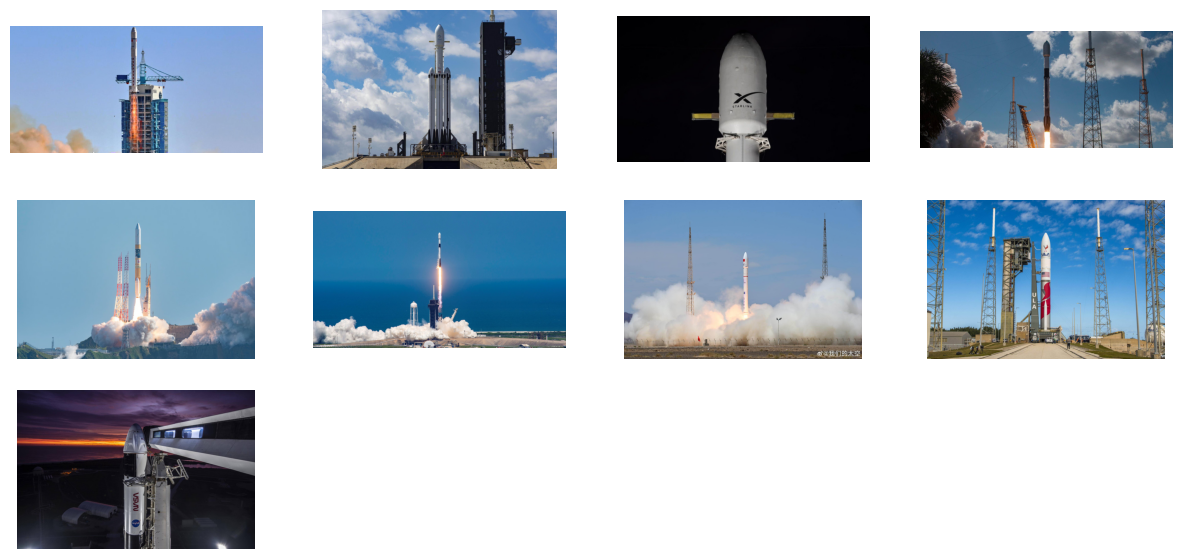

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

image_files = glob.glob('./image/*')

plt.figure(figsize=(15, 7))
for i, file in enumerate(image_files):
    plt.subplot(3, 4, i+1)  # 3행 4열의 그림 위치를 지정
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off')
plt.show()